In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})

def _read_Ltot(pickle_path):
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    return data["simtime_Myr"], data["total_lumi"]

def _read_Rmed(pickle_path):
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    return data["simtime_Myr"], np.median(data["radius"][data["bubble_open"]==0])

def _read_fopen(pickle_path):
    with open(pickle_path, 'rb') as f:
        data = pickle.load(f)
    return data["simtime_Myr"], np.median(np.sum(data["bubble_open"])/data["bubble_open"].size)



c000050
c000100
c000167
c000500
c001000
c001670


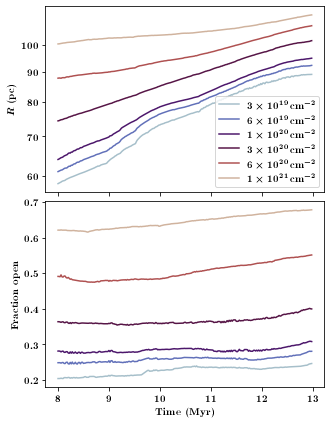

In [13]:
cmap = plt.get_cmap('twilight')
colors = cmap(np.linspace(0.1,0.9,6))

cd_names  = ["c000050", "c000100", "c000167", "c000500", "c001000", "c001670"]
#cd_labels = ["3e19", "6e19", "1e20", "3e20", "6e20", "1e21"]
cd_labels = [r"$3\times10^{19}\,\mathrm{cm}^{-2}$",
             r"$6\times10^{19}\,\mathrm{cm}^{-2}$",
             r"$1\times10^{20}\,\mathrm{cm}^{-2}$",
             r"$3\times10^{20}\,\mathrm{cm}^{-2}$",
             r"$6\times10^{20}\,\mathrm{cm}^{-2}$",
             r"$1\times10^{21}\,\mathrm{cm}^{-2}$"]

fig, ax = plt.subplots(figsize=(5,7), nrows=2, sharex=True)

for i, cd, label in zip(range(6), cd_names, cd_labels):
    print(cd)
    global_times = []
    global_Xlum  = []
    global_Rmed  = []
    global_fopen = []

    for file_no in range(800,1300,2):
        pickle_path = "datafiles/data-float32/SILCC_hdf5_plt_cnt_"+str(file_no).zfill(4)+"-r0150-"+cd+"-data-float32.pkl"
        t, Ltot  = _read_Ltot(pickle_path)
        t, Rmed  = _read_Rmed(pickle_path)
        t, fopen = _read_fopen(pickle_path)
        global_times.append(t)
        global_Xlum.append(Ltot)
        global_Rmed.append(Rmed)
        global_fopen.append(fopen)

    #ax[0].semilogy(global_times, global_Xlum, label=label, color = colors[i])
    ax[0].semilogy(global_times, global_Rmed, label=label, color = colors[i])
    ax[1].plot(global_times, global_fopen, label=label, color = colors[i])

ax[0].set_yticks([60,70,80,90,100])
ax[0].set_yticklabels(["$60$","$70$","$80$","$90$","$100$"])
ax[0].legend(loc='lower right')#, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=12)
ax[1].set_xlabel("\\textbf{Time (Myr)}")
#ax[0].set_ylabel("$L_X~(\\mathrm{erg~s}^{-1})$")
ax[0].set_ylabel("$R~(\\mathrm{pc})$")
ax[1].set_ylabel("\\textbf{Fraction open}")
fig.subplots_adjust(hspace=0.05)
fig.savefig("plots/total-L-R-fopen-all-CD.pdf", bbox_inches="tight")